실습 하기에 앞서 텐서플로우 2.x설치

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf #텐서플로우 2.x 실행 

In [2]:
tf.__version__

'2.2.0'

##1. 랜덤으로 만든 시계열 데이터 연습(Many-to-one)

In [3]:
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

In [4]:
data = np.sin(2*np.pi*np.arange(0, 1000))*10 + np.random.random(1000)
data.shape

(1000,)

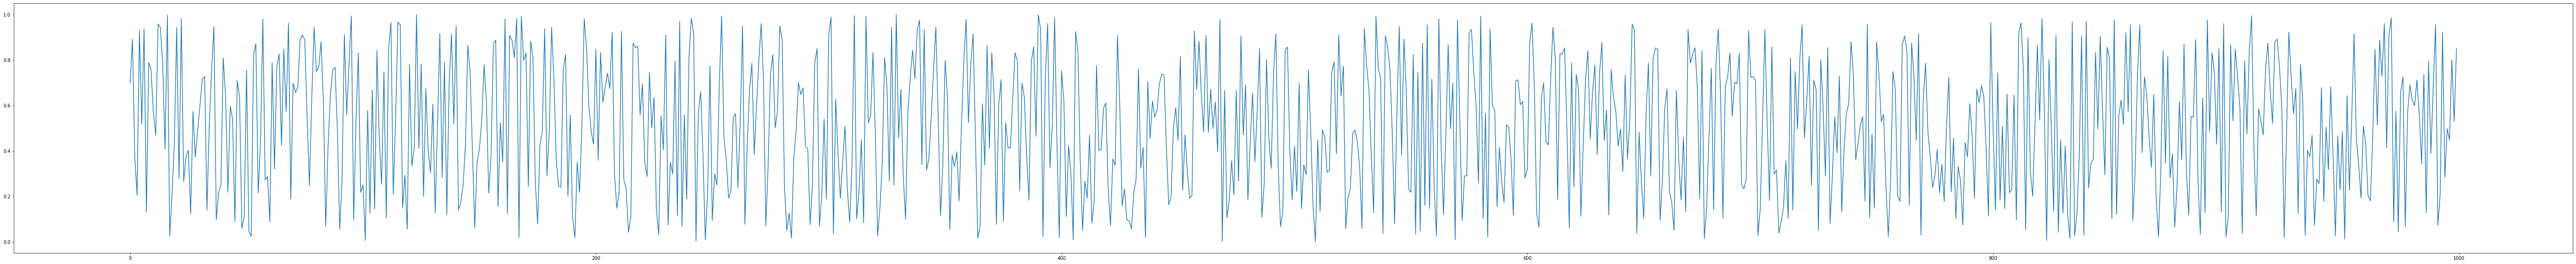

In [5]:
plt.figure(figsize=[100, 10])
plt.plot(np.arange(0, 1000), data)
plt.show()

In [6]:
x_sin = np.array([[[data[i+j]] for j in range(10)] for i in range(len(data)-9-1)])
y_sin = np.array([[data[i+10]] for i in range(len(data)-10)])
x_sin.shape, y_sin.shape

((990, 10, 1), (990, 1))

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_sin, y_sin, shuffle=False) # shuffle = False로 명시하면, 데이터셋 순차적으로 split

RNN의 Degradation 문제를 해결한 LSTM 모형을 구현해보겠습니다.  
  
정작 코드로 구현하는 것은 단순합니다.  
layer의 구조를 SimpleRNN에서 LSTM만 바꾸면 됩니다.

우선, 단층 LSTM을 구현해보자.

In [8]:
model = models.Sequential()
model.add(layers.LSTM(10,input_shape = (10,1)))
model.add(layers.Dense(1))

model.compile(optimizer='adam',loss='mse')
model.fit(x_train,y_train,epochs=10,verbose=0)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for model_weight in model.weights:
    print(model_weight.name, '->', model_weight.shape)

lstm_12/lstm_cell_12/kernel:0 -> (1, 40)
lstm_12/lstm_cell_12/recurrent_kernel:0 -> (10, 40)
lstm_12/lstm_cell_12/bias:0 -> (40,)
dense_9/kernel:0 -> (10, 1)
dense_9/bias:0 -> (1,)


In [ ]:
y_hat = model.predict(x_test)

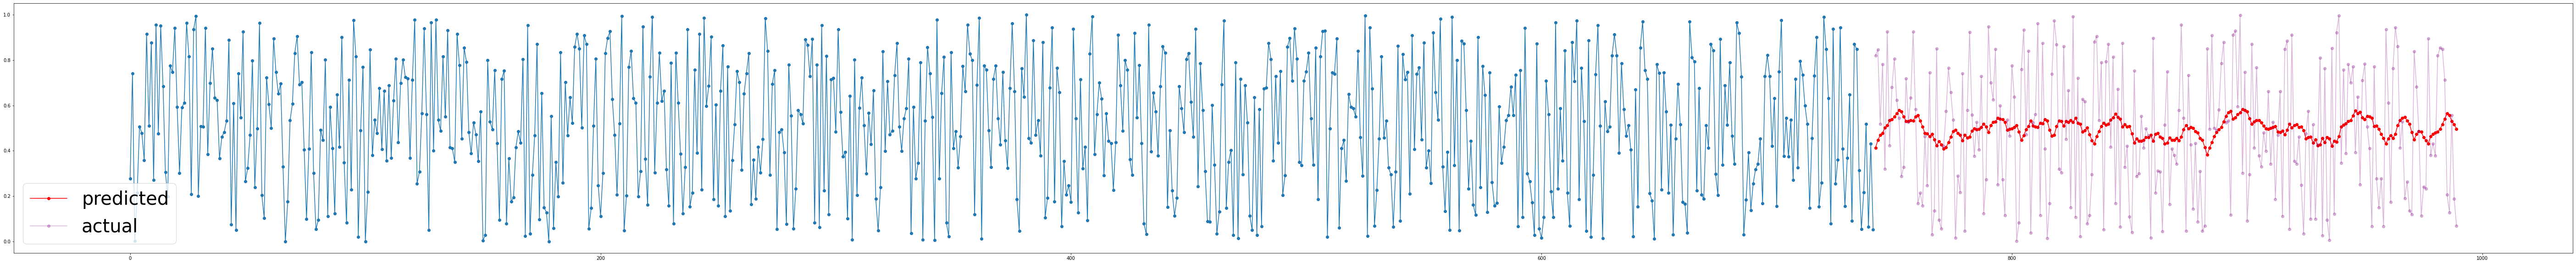

In [ ]:
y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(100,10))
plt.plot(y_axis, y_train.reshape(len(x_train),), '-o') #Train데이터 그래프로 표현
plt.plot(y_2_axis, y_hat.reshape(len(x_test),), '-o', color='red', label='predicted') #x_test 예측값 그래프로 표현
plt.plot(y_2_axis, y_test.reshape(len(x_test),), '-o', color='purple', alpha=0.3, label='actual') #y_test 실제값 그래프로 표현 
plt.legend(fontsize=40)
plt.show()

다층 LSTM도 SimpleRNN과 구현하는 방식은 동일하다.

In [ ]:
model = models.Sequential()
model.add(layers.LSTM(10,input_shape = (10,1), return_sequences=True))
model.add(layers.LSTM(10))
model.add(layers.Dense(1))

model.compile(optimizer='adam',loss='mse')
model.fit(x_train,y_train,epochs=10,verbose=0)

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 10, 10)            480       
_________________________________________________________________
lstm_14 (LSTM)               (None, 10)                840       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for model_weight in model.weights:
    print(model_weight.name, '->', model_weight.shape)

lstm_13/lstm_cell_13/kernel:0 -> (1, 40)
lstm_13/lstm_cell_13/recurrent_kernel:0 -> (10, 40)
lstm_13/lstm_cell_13/bias:0 -> (40,)
lstm_14/lstm_cell_14/kernel:0 -> (10, 40)
lstm_14/lstm_cell_14/recurrent_kernel:0 -> (10, 40)
lstm_14/lstm_cell_14/bias:0 -> (40,)
dense_10/kernel:0 -> (10, 1)
dense_10/bias:0 -> (1,)


In [ ]:
y_hat = model.predict(x_test)

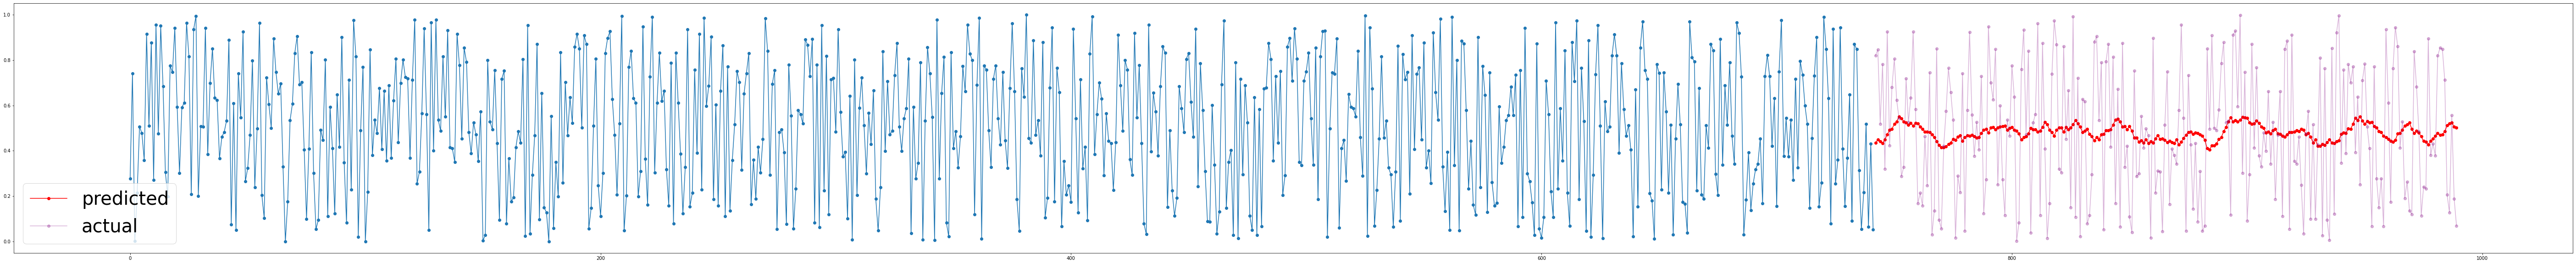

In [ ]:
y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(100,10))
plt.plot(y_axis, y_train.reshape(len(x_train),), '-o') #Train데이터 그래프로 표현
plt.plot(y_2_axis, y_hat.reshape(len(x_test),), '-o', color='red', label='predicted') #x_test 예측값 그래프로 표현
plt.plot(y_2_axis, y_test.reshape(len(x_test),), '-o', color='purple', alpha=0.3, label='actual') #y_test 실제값 그래프로 표현 
plt.legend(fontsize=40)
plt.show()

### 원달러 환율 예측

원달러 환율 900일 데이터를 가지고 확율 예측 모델을 만들겟습니다.

In [10]:
import pandas as pd
data = pd.read_excel('Dollor.xlsx')

In [13]:
X = np.array(data.iloc[:,1:]) 
X = (X-X.mean(axis=0))/X.std(axis=0) #정규화

900일동안 환율의 상태를 살펴보면 변동이 크게 있는 것을 알수가 있습니다.

No handles with labels found to put in legend.


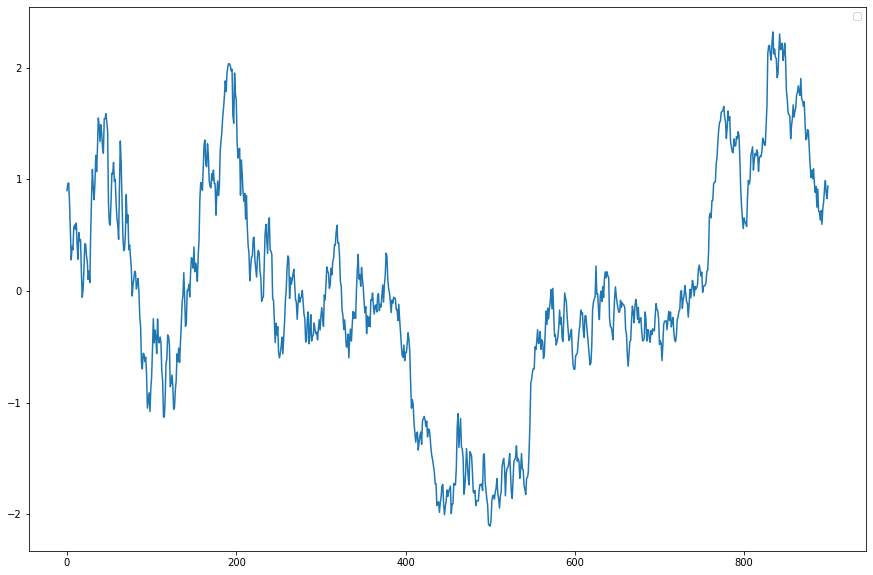

In [14]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(len(X)),X)
plt.legend()
plt.show()

In [15]:
#데이터를 쪼개는 과정
x = np.array([X[i+j] for i in range(len(X)-9) for j in range(10)]).reshape(-1,10,1)
y = np.array([X[i+10] for i in range(len(X)-10)]).reshape(-1,1)
x_split = int(x.shape[0]*0.7)
y_split = int(y.shape[0]*0.7)
x_train = x[:x_split]
x_test = x[x_split:-1,:,:]
y_train = y[:y_split]
y_test = y[y_split:]

In [16]:
#모델 만드는 과정
model = models.Sequential()
model.add(layers.LSTM(8,input_shape = (10,1), return_sequences=True))
model.add(layers.LSTM(8))
model.add(layers.Dense(1))

model.compile(optimizer='adam',loss='mse')

In [17]:
model.fit(x_train,y_train,epochs=100, verbose=1, shuffle=True)

Epoch 1/100
20/20 [==============================] - 0s 4ms/step - loss: 1.0056
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6746
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4250
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2657
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1831
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1471
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1319
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1196
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1094
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1011
Epoch 11/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0947
Epoch 12/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0895
Epoch 13/100
20/20 [=================

In [18]:
#예측값 뽑기
y_hat = model.predict(x_test, batch_size=1)

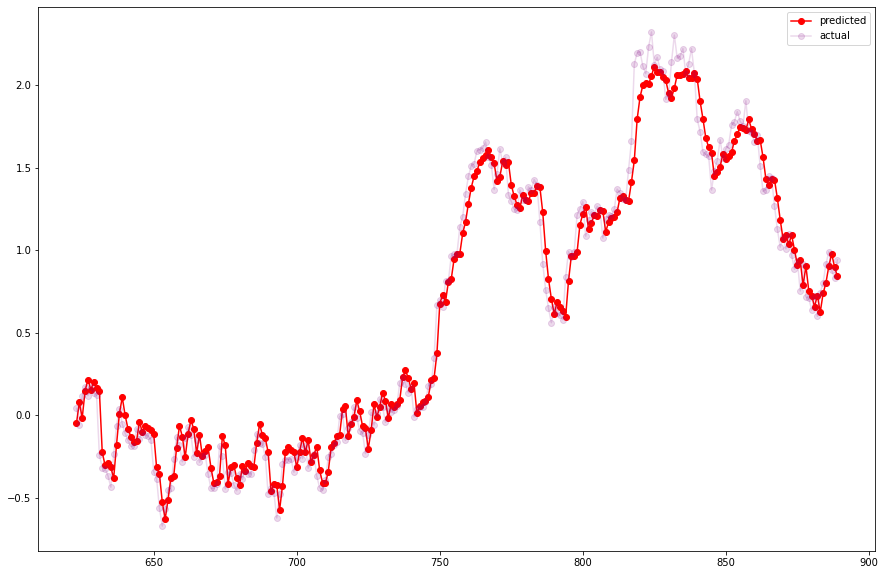

In [19]:
#예측값과 실제 값 비교
y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(15,10))
plt.plot(y_2_axis, y_hat.reshape(y_hat.shape[0],), '-o', color='red', label='predicted')
plt.plot(y_2_axis, y_test.reshape(y_test.shape[0],), '-o', color='purple', alpha=0.15, label='actual')
plt.legend()
plt.show()